In [483]:
import pandas as pd
import numpy as np
import os
PATH = "/home/tuandinh/Desktop/ML and AI/Master Machine Learning/datasets/housing_data/housing.csv"
def load_data(path = PATH):
    data = pd.read_csv(PATH)
    return data
IMAGES_PATH = "/home/tuandinh/Desktop/ML and AI/Master Machine Learning/images"
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [484]:
housing = load_data(PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [485]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [486]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [487]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [488]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


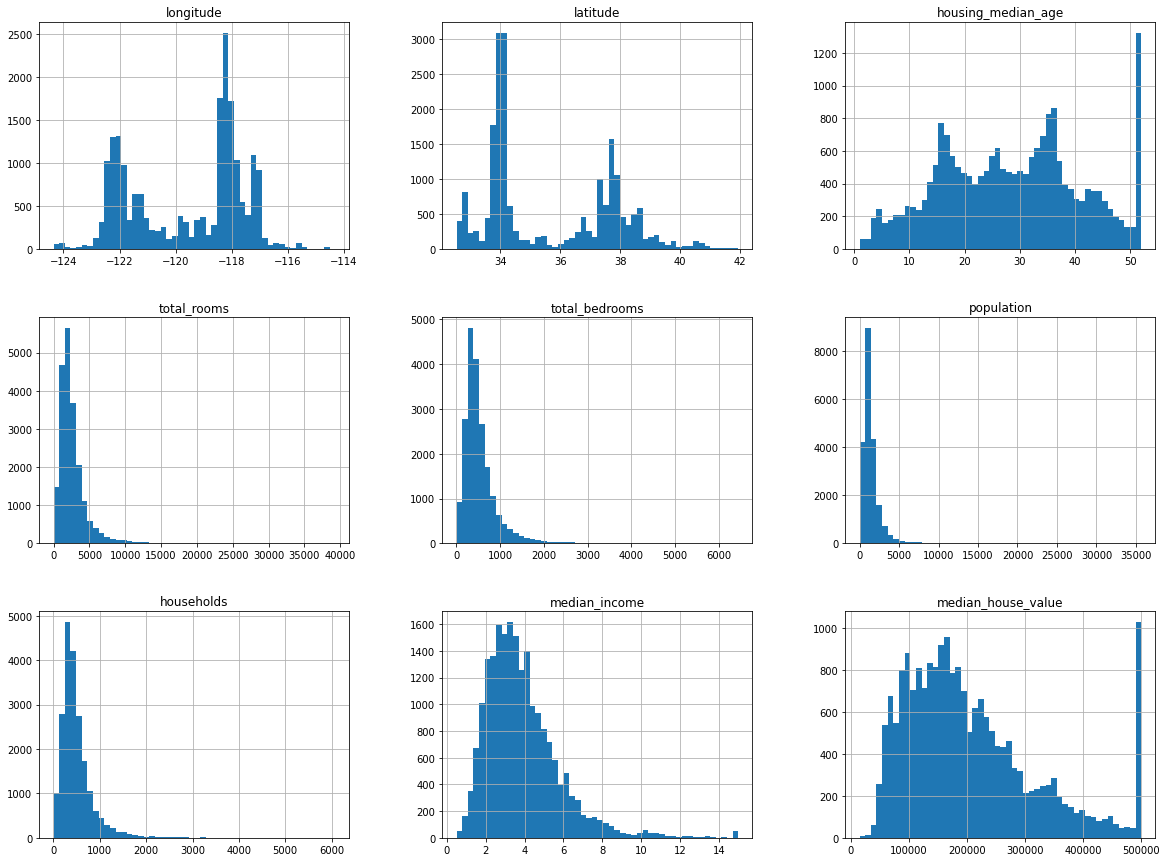

In [489]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

**Create a test set**

+ Theo thời gian, bạn (hoặc các thuật toán Học máy của bạn) sẽ thấy toàn bộ tập dữ liệu, đó là điều bạn muốn tránh.
Một giải pháp là lưu bộ thử nghiệm trong lần chạy đầu tiên và sau đó tải nó trong các lần chạy tiếp theo. Một tùy chọn khác là đặt hạt giống của trình tạo số ngẫu nhiên (ví dụ: np.ran dom.seed (42)) 12 trước khi gọi np.random.permutation (), để nó luôn tạo ra các chỉ số xáo trộn giống nhau.

In [490]:
np.random.seed(42)

In [491]:
# Using train_test_split in laibrary scikit-learn
from sklearn.model_selection import train_test_split

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # Hoán vị ngẫu nhiên một dãy hoặc trả về một dãy đã hoán vị.
    test_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_size] # lay tu dau den test size
    train_indices = shuffled_indices[test_size:] # lay tu test_size den het
    return data.iloc[train_indices], data.iloc[test_indices]

In [492]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), " train",len(test_set), " test" )

16512  train 4128  test


### **TOPICS**
> + Chia test_data sao cho các lần chạy dữ liệu trong tập test không chứa bất kì trường hợp nào đã có trong tập training_tata
> + Hai giải pháp chia dữ liệu trên có điểm thiếu sót nếu bạn thêm dât mới (update) lại dataset, tức là khi bạn có các dữ liệu mới 
> + Cần phải đảm bảo làm sao dữ liệu nhất quán trên nhiều lần chạy
> 
> **Giải pháp phổ biến:**
   > + bạn có thể tính toán một băm của số nhận dạng của từng cá thể, chỉ giữ lại byte cuối cùng của mã băm và đặt đối tượng đó vào tập hợp thử nghiệm nếu giá trị này thấp hơn hoặc bằng 51 (~ 20% của 256)
   > + sử dụng số nhận dạng của từng cá thể để quyết định xem nó có nên xuất hiện trong tập thử nghiệm hay không (giả sử các cá thể có một số nhận dạng duy nhất và không thể thay đổi)
   > + Tập hợp thử nghiệm mới sẽ chứa 20% các trường hợp mới, nhưng nó sẽ không chứa bất kỳ trường hợp nào trước đó đã có trong tập huấn luyện.

> **Here is a possible implementation:**

In [493]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio # digest() : Returns the encoded data in byte format.

'''def split_train_test_by_id(data, test_ratio, id_column, hash= hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set, data.loc[in_test_set]] '''


'def split_train_test_by_id(data, test_ratio, id_column, hash= hashlib.md5):\n    ids = data[id_column]\n    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))\n    return data.loc[~in_test_set, data.loc[in_test_set]] '

### The method more quickly below

In [494]:
from zlib import crc32

def test_set_check(indetifier, test_ratio):
    return crc32(np.int64(indetifier)) & 0xffffffff < test_ratio * 2 ** 32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

> + Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. The simplest function is **train_test_split**, which does pretty much the same thing as the function split_train_test defined earlier, with a couple of additional
features.
> + It's like the first method I created

In [495]:
# The simplest solution is to use the row index as the ID:
# Them cot index
housing_with_id = housing.reset_index() ## adds an 'index' column
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [496]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [497]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [498]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


> + ***Để không bị thiên lệch do thu nhập của một sô ngưoif trên 60000$ là không nhiều ta nhóm chúng thành 1 feature mới là ngưoif có thu nhập trên 50000$. Điều này gíup model của chúng ta có cái nhìn đúng đăn hơn và không bị thiên lệch***

+ pandas.cut - Sử dụng cắt khi bạn cần phân đoạn và sắp xếp các giá trị dữ liệu vào các thùng. Hàm này cũng hữu ích để chuyển từ một biến liên tục sang một biến phân loại. Ví dụ: việc cắt giảm có thể chuyển đổi độ tuổi thành các nhóm độ tuổi. Hỗ trợ đóng thùng vào một số lượng thùng bằng nhau hoặc một dãy thùng được chỉ định trước.

In [499]:
housing["income_cat"] = pd.cut(housing["median_income"],
                        bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                        labels=[1,2,3,4,5])
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [500]:
# Xem cac khonag da dong deu hay chua
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

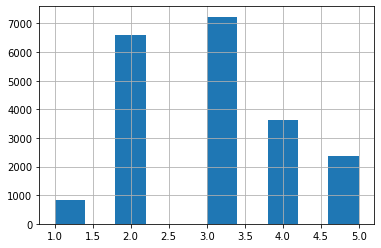

In [501]:
housing["income_cat"].hist()

### **This Link: [Lấy mẫu ngẫu nhiên phân tầng](https://www.investopedia.com/terms/stratified_random_sampling.asp#:~:text=Stratified%20random%20sampling%20is%20a,as%20income%20or%20educational%20attainment.)**

In [502]:
# stratified sampling based on the income category. For this use Scikit-Learn’s StratifiedShuffleSplit class:
# Lấy mẫu phân tầng dựa trên danh mục thu nhập.
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [503]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [504]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [505]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [506]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [507]:
# Remove the income_cat attribute so the data is back to its original state:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### II. Discover and Visualize the Data to Gain Insights

In [508]:
housing = strat_train_set.copy()
housing.shape


(16512, 10)

#### Visualizing Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

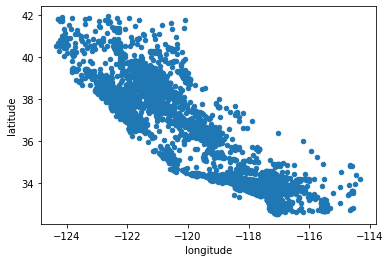

In [509]:
housing.plot(kind="scatter", x="longitude", y= "latitude" )

+ hình dung những nơi có mật độ điểm dữ liệu cao

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

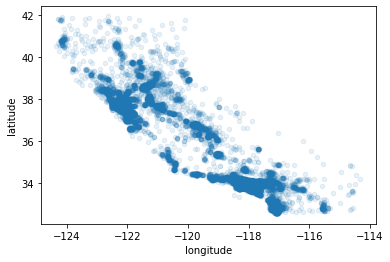

In [510]:
housing.plot(kind="scatter", x="longitude", y= "latitude" , alpha=0.1)

Saving figure housing_prices_scatterplot


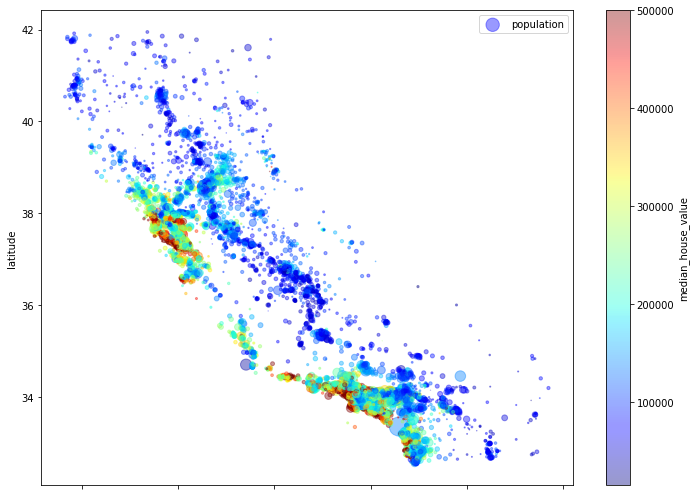

In [511]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
save_fig("housing_prices_scatterplot")

## Looking for Correlations

+ Vì tập dữ liệu không quá lớn, bạn có thể dễ dàng tính toán hệ số tương quan chuẩn (còn được gọi là Pearson’s r) giữa mọi cặp thuộc tính bằng cách sử dụng phương thức corr ():
**corr_matrix = housing.corr ()**
+ Hệ số tương quan nằm trong khoảng –1 đến 1. Khi nó gần bằng 1, có nghĩa là có mối tương quan thuận mạnh

In [512]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

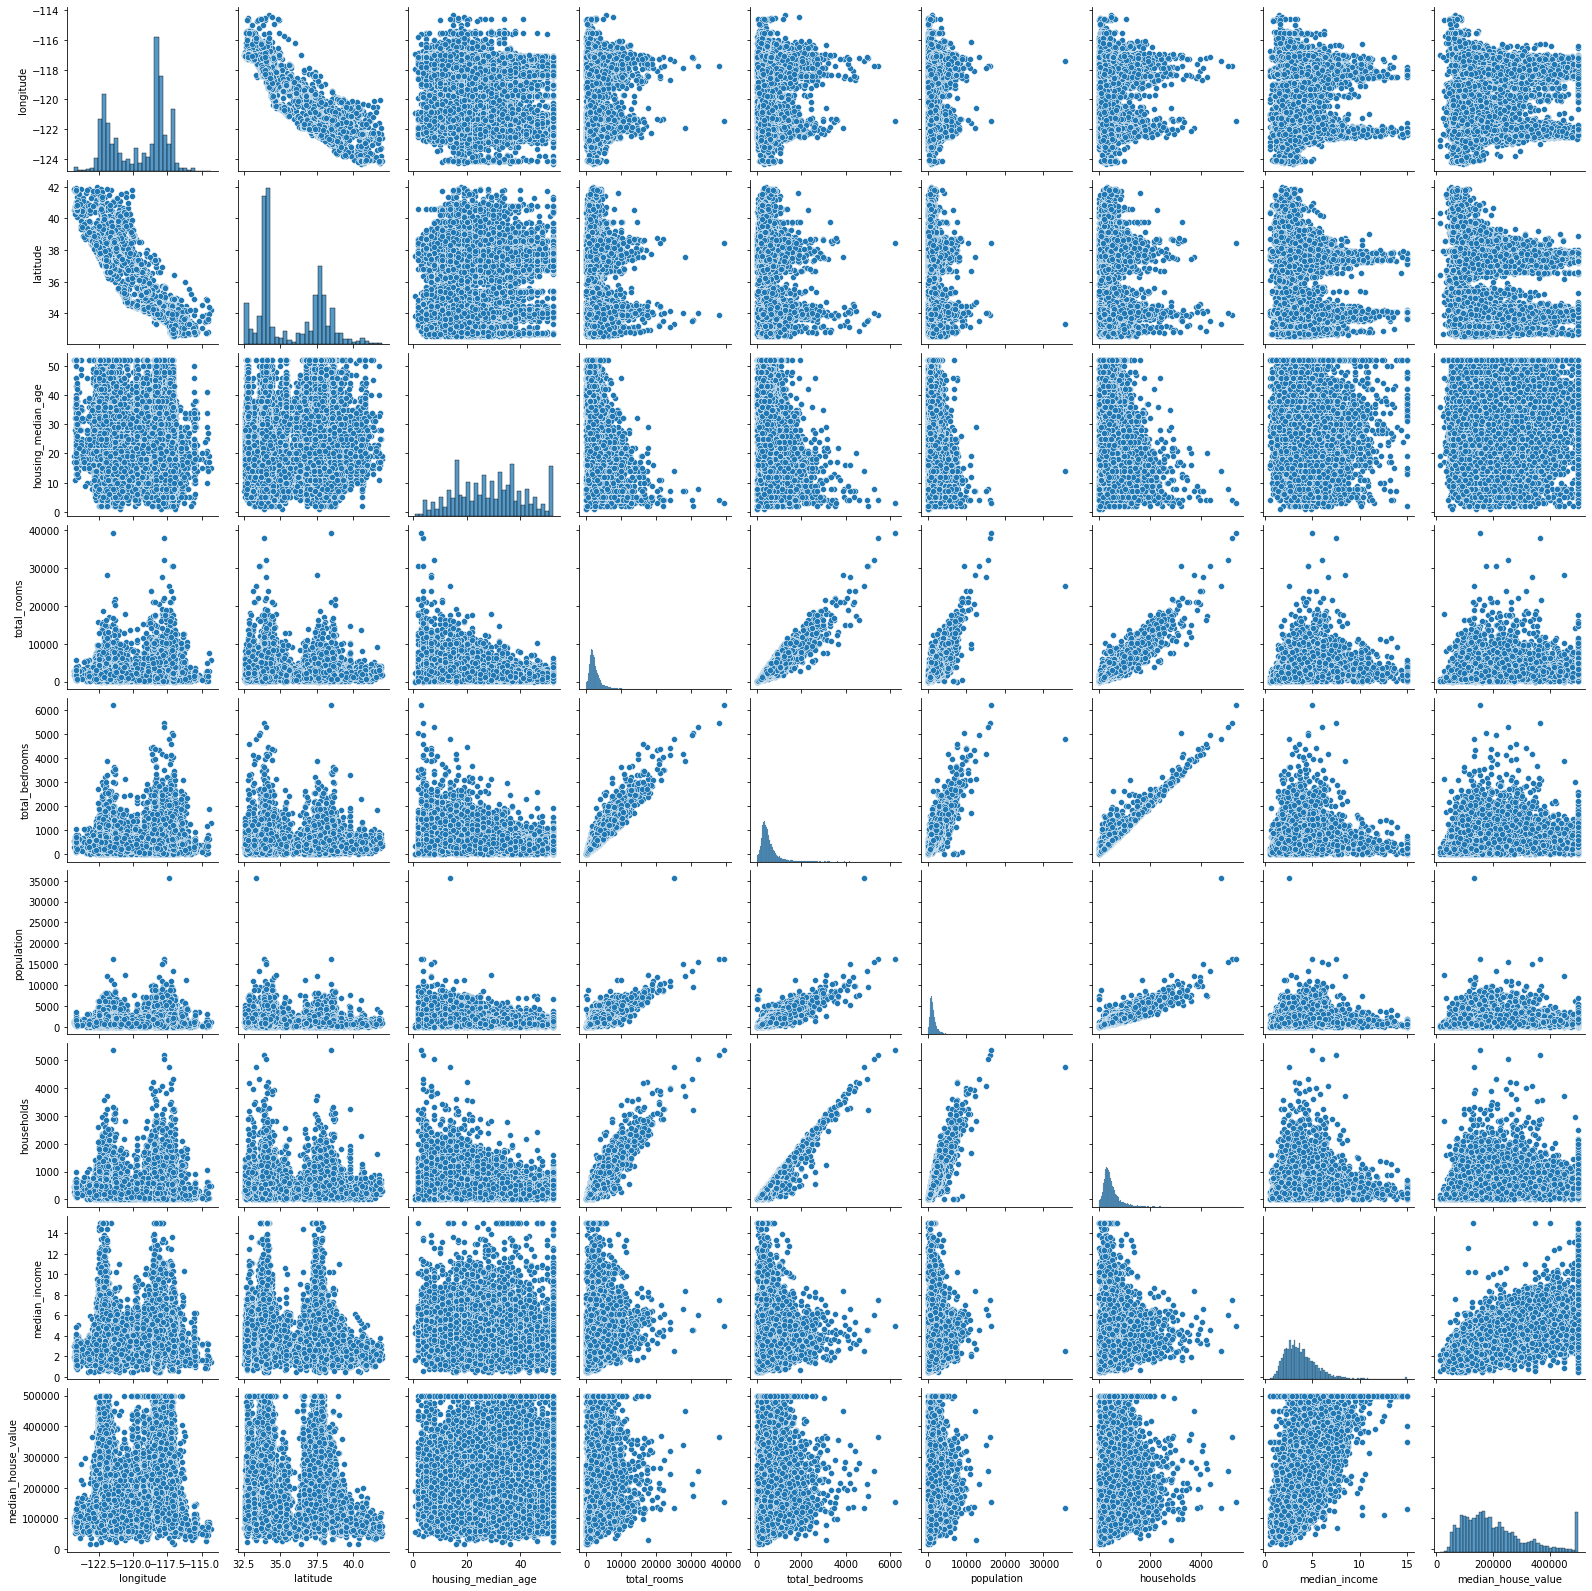

In [513]:
import seaborn as sns 
sns.pairplot(housing)

> + Một cách khác để xem mối tưong quan giữa các feature. Ở đây chỉ xem một số đặc trưng nhất định

Saving figure scatter_matrix_plot


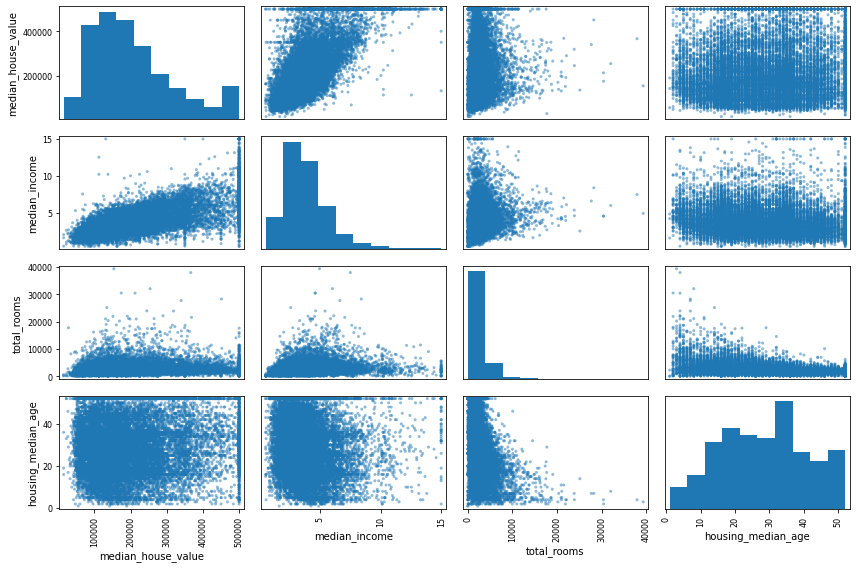

In [514]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income","total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize= (12,8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


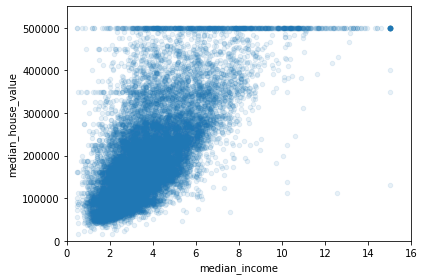

In [515]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

## Experimenting with Attribute Combinations

> + Nên gộp lại những thuộc tính bổ trợ cho nhau, hoặc có thể gộp lại sẽ tốt hơn
> + Ví dụ bạn biết tất cả số phòng ngủ của một quận nhưng không biết quận đó có bao nhiêu nhà, điều đó không thực sự hữu ích. Vì chúng ta muốn ở đây là xác định số phòng của mỗi nhà. Như  vậy dự đoán giá cho ngôi nhà sẽ chuẩn hơn.
> + Ý tưởng: Chuyển các feature chung chung thành chi tiết hơn, liên quan mật thiết đến đối tượng cần dự đoán. Như  vậy mô hình máy học sẽ dự đoán tốt hơn

In [516]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [517]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedromms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]


> Thuộc tính phòng ngủ mới có tương quan nhiều hơn với giá trị trung bình của ngôi nhà so với tổng số phòng hoặc phòng ngủ. Rõ ràng những ngôi nhà có tỷ lệ phòng ngủ / phòng thấp hơn có xu hướng đắt hơn. Số lượng phòng cho mỗi hộ gia đình cũng có nhiều thông tin hơn so với tổng số phòng trong một quận - rõ ràng là những ngôi nhà càng lớn thì càng đắt tiền.


> + ***Ta có thể xem mối quan hệ tưong quan ở bên dưới***

In [518]:
# And now let’s look at the correlation matrix again:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedromms_per_room          -0.259952
Name: median_house_value, dtype: float64

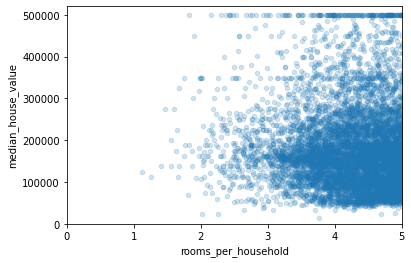

In [519]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

### **Prepare the Data for Machine Learning Algorithms**

In [520]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### **Data Cleaning**
> + Chúng ta sẽ xử lý các giá trị bị thiếu ở feature "total_bedrooms"

> + Some variant: 
```python
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

In [521]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [522]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [523]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [524]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3: Luu ys phai co inplace=True
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


> **Scikit-Learn cung cấp một lớp tiện dụng để xử lý các giá trị còn thiếu: Imputer**

> + Imputer chỉ đơn giản là tính toán giá trị trung bình của từng thuộc tính và lưu trữ kết quả trong biến thể hiện Statistics_ của nó.

In [525]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') ## the sames option 3

In [526]:
# Since the median can only be computed on numerical attributes, we need to create a
# copy of the data without the text attribute ocean_proximity:
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [527]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [528]:
# Imputer chỉ đơn giản là tính toán giá trị trung bình của từng thuộc tính và lưu trữ kết quả trong biến thể hiện Statistics_ của nó.
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [529]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [530]:
# Now you can use this “trained” imputer to transform the training set by replacing
# missing values by the learned medians:
X = imputer.transform(housing_num)
# The result is a plain Numpy array containing the transformed features

In [531]:
# put it back into a Pandas DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

### **Handling Text and Categorical Attributes**

In [532]:
housing_categories = housing[["ocean_proximity"]].copy()
housing_categories.head(5)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [533]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_categories)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

> + **Scikit-Learn provides a OneHotEncoder encoder to convert integer categorical values into one-hot vectors**

In [534]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_categories)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [535]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [536]:
# ' sparse = False' -> toarray luon cho mang onehotencoder
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_categories)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [537]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### **Custom Transformers**

In [538]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


> + We need to convert more the following features: "rooms_per_house", "population_per_households", "bedrooms_per_room'. 3, 4, 5 , 6 here represent the index of the data columns that need to be calculated to add these data columns.
> + Note that we have concluded that the data correlation of these new features is better for our home price prediction model.

In [539]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [540]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
# numpy.c_ : Translates slice objects to concatenation along the second axis.
'''
np.c_[np.array([1,2,3]), np.array([4,5,6])]
array([[1, 4],
       [2, 5],
       [3, 6]])
'''
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [541]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs,
                                    columns=list(housing.columns) + ["room_per_household", "population_per_house_hold"], # nho la phai co list nha
                                    index= housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,room_per_household,population_per_house_hold
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


### **Tranformation Piline**
> + There are many data transformation steps that need to be executed in the right order
> + Scikit-Learn provides the Pipeline class to help with such sequences of transformations

In [542]:
housing_num.shape

(16512, 8)

In [543]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipline.fit_transform(housing_num)

In [544]:
print(housing_num_tr.shape)
housing_num_tr

(16512, 11)


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [545]:
housing_num_tr = pd.DataFrame(housing_num_tr,
                columns=list(housing_num.columns) +["room_per_household", "population_per_house_hold", "bedrooms_per_room"],
                index= housing_num.index)

In [546]:
housing_num_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room_per_household,population_per_house_hold,bedrooms_per_room
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.810867
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.338273
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.961205
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,-0.474513


> Tạo một pipeline xử lí cả numeric features và non-numeric

In [547]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [548]:
housing_prepared.shape

(16512, 16)

In [549]:
from sklearn.base import BaseEstimator, TransformerMixin
# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

In [550]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
old_num_pipeline = Pipeline([
    ('selector', OldDataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

old_cat_pipeline = Pipeline([
    ('selector', OldDataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse=False)),
])

In [551]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", old_num_pipeline),
    ("cat_pipeline", old_cat_pipeline),
])

In [552]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

+ **Result is the same as with the ColumnsTransformer**

In [553]:
np.allclose(housing_prepared, old_housing_prepared)

True

### **Seclect And Train Model**

In [554]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [556]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


+ Compare with labels

In [557]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [561]:
from sklearn.metrics import mean_absolute_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49438.66860915802

#### **DecisonTreeRegression**

In [562]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [565]:
# Overfit with DecisionTreeRegression
from sklearn.metrics import mean_squared_error
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### **Better Evaluation Using Cross-Validation**

In [566]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
         scoring="neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [567]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


In [574]:
# with linearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
            scoring="neg_mean_squared_error", cv= 10)
linear_rmse_score = np.sqrt(-lin_scores)
display_scores(linear_rmse_score)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180694


In [1]:
from sklearn.ensemble import RandomForestRegressor
forest_rg = RandomForestRegressor(n_estimators=100, random_state= 42)
forest_rg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_rg, housing_prepared, housing_labels,
                scoring= "neg_mean_squared_error", cv=10)
display_scores(forest_scores)

NameError: name 'housing_prepared' is not defined